## Importing necessary libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data into pandas dataframe

In [11]:
natgas = pd.read_csv("Nat_Gas.csv")
natgas.info()
natgas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


## Performed a data transformation to Dates column


In [12]:
# Converted the data type of Dates column from object to datetime
natgas['Dates'] = pd.to_datetime(natgas['Dates'])
natgas.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


## Proceeding with Linear Regression Model

- Although we can also it using LSTM (Long Short Term Memory) model but considering the simplicity of the dataset, I chose to proceed with Linear Regression.

In [14]:
# Feature Extraction
natgas['month_num'] = np.arange(len(natgas))
X = natgas[['month_num']]
y = natgas['Prices']

# Training a Linear Regression Model
model = LinearRegression()
model.fit(X,y)

# Function to estimate gas price
def estimate_price(input_date):
    input_month = (pd.to_datetime(input_date) - natgas['Dates'].min()).days // 30
    predicted_price = model.predict([[input_month]])[0]
    return predicted_price

# Example
print("Estimated Price:", estimate_price('2025-10-01'))

Estimated Price: 12.592053480966854


## Extrapolating the data for One Year
- Used the trained model, predicted prices for next 12 months and visualized the trends.

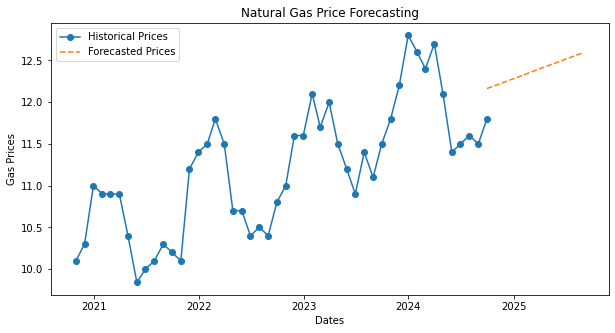

In [17]:
# Generate future dates

future_months = np.arange(natgas['month_num'].max() + 1, natgas['month_num'].max() + 13)
future_prices = model.predict(future_months.reshape(-1,1))

# Plotting Results

plt.figure(figsize=(10,5))
plt.plot(natgas['Dates'], natgas['Prices'], label = 'Historical Prices', marker = 'o')
plt.plot(pd.date_range(natgas['Dates'].max(), periods = 12, freq = 'M'), future_prices, label = "Forecasted Prices", linestyle = '--')
plt.xlabel('Dates')
plt.ylabel('Gas Prices')
plt.title('Natural Gas Price Forecasting')
plt.legend()
plt.show()

## Identifying Trends and performing further analysis and visualizations

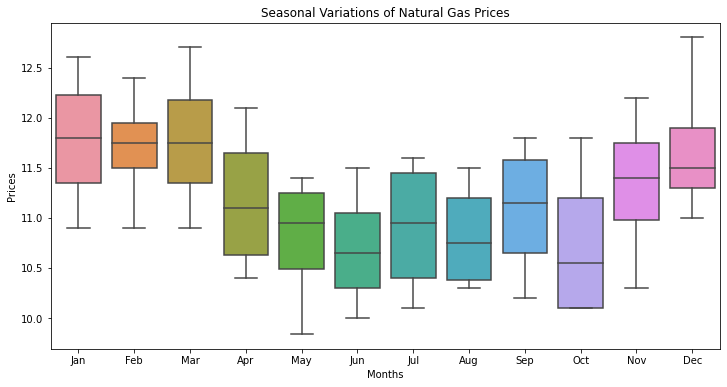

In [41]:
natgas.set_index('Dates', inplace=True)

# Extracted month and year for seasonal analysis
natgas['Month'] = natgas.index.month
natgas['Year'] = natgas.index.year

# Monthly trends across different years
plt.figure(figsize=(12,6))
sns.boxplot(x=natgas['Month'], y=natgas['Prices'])
plt.xlabel('Months')
plt.ylabel('Prices')
plt.title('Seasonal Variations of Natural Gas Prices')
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

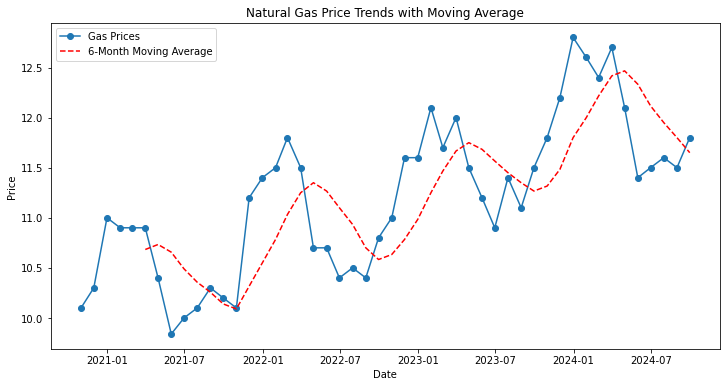

In [45]:
# Finding long-Term trends with moving average

natgas['Rolling Avg'] = natgas['Prices'].rolling(window=6).mean()

plt.figure(figsize=(12,6))
plt.plot(natgas.index, natgas['Prices'], label = 'Gas Prices', marker ='o')
plt.plot(natgas.index, natgas['Rolling Avg'], label = '6-Month Moving Average', linestyle = '--', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Price Trends with Moving Average')
plt.legend()
plt.show()

## Observations
- The boxplot visualization highlights price trends over different months.
- Moving Average provides us a clearer picture of whether the prices are generally increasing/decreasing/being stable.